In [85]:
# Importing libarys needed
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import matplotlib.cm as cm
import matplotlib.pyplot as pyplot
import tensorflow as tf
from torch.autograd import Variable


In [189]:
class Visualizer: 
    def __init__(self, epochs):
        self.epochs = epochs
        self.loss_values = []
        self.epoch_values = {}
    
    #FUNCTION TO APPEND TO A DICTIONARY
    def append_value(self, dict_obj, key, value):
        if key in dict_obj:
            if not isinstance(dict_obj[key], list):
                dict_obj[key] = [dict_obj[key]]
            dict_obj[key].append(value)
            return dict_obj
        else:
            dict_obj[key] = {}
            dict_obj[key] = value
            return dict_obj
    
    #GENERIC FUNCTION TO ADD OTHER DATA TO A SPECIFIC EPOCH
    def add_info(self, epoch, value, string):
        temp_dicht = {}
        if epoch in self.epoch_values:
            self.epoch_values[epoch] = self.append_value(
                self.epoch_values[epoch], string, value)
        else:
            self.epoch_values = self.append_value(self.epoch_values,
                                                  epoch, self.append_value(temp_dicht, string, value))
        return
    
    #ADD LOSS TO A SPECIFIC EPOCH
    def add_loss(self  , epoch, value):
        temp_dicht = {}
        if epoch in self.epoch_values:
            self.epoch_values[epoch] = self.append_value(self.epoch_values[epoch], 'Loss_values', value)
        else:
            self.epoch_values = self.append_value(self.epoch_values,
            epoch, self.append_value(temp_dicht, 'Loss_values', value))
        return
    
    #FUNCTION TO CALL AT THE END OF EACH EPOCH
    def add_trainAccurancy(self, epoch, value):
        self.add_info(epoch, len(
            self.epoch_values[epoch]['Loss_values']), 'Loss_lenght')
        self.add_info(epoch, value, 'Train_Accurancy')
        self.add_info(epoch, np.mean(
            np.array(self.epoch_values[epoch]['Loss_values'])), 'Loss_mean')
        return     
    
    def add_validationAccurancyLoss(self, epoch, value_accurancy, value_loss):
        self.add_info(epoch, value_accurancy, 'Validation_Accurancy')
        self.add_info(epoch, value_loss, 'Validation_Loss')
    #RETURN THE WHOLE DICTIONARY WITH THE DATA
    
    def get_epochs(self):
        return self.epoch_values
    
    #RETURN A SPECIFIC EPOCH
    def get_epoch(self, epoch):
        return self.epoch_values[epoch]
    
    #VIEW CLASSIFY
    def view_classify(img, ps, version="MNIST", lenght = 784 ):
        
        ps = ps.data.numpy().squeeze()

        fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
        ax1.imshow(img.resize_(1, np.sqrt(lenght),
                               np.sqrt(lenght)).numpy().squeeze())
        ax1.axis('off')
        ax2.barh(np.arange(10), ps)
        ax2.set_aspect(0.1)
        ax2.set_yticks(np.arange(10))
        if version == "MNIST":
            ax2.set_yticklabels(np.arange(10))
        elif version == "Fashion":
            ax2.set_yticklabels(['T-shirt/top',
                                'Trouser',
                                'Pullover',
                                'Dress',
                                'Coat',
                                'Sandal',
                                'Shirt',
                                'Sneaker',
                                'Bag',
                                'Ankle Boot'], size='small')
        ax2.set_title('Class Probability')
        ax2.set_xlim(0, 1.1)

        plt.tight_layout()
    
    #DISPLAY THE IMAGE OF THE IMAGE PASSED 
    def imshow(image, ax=None, title=None, normalize=True):
        """Imshow for Tensor."""
        if ax is None:
            fig, ax = plt.subplots()
        image = image.numpy().transpose((1, 2, 0))

        if normalize:
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            image = std * image + mean
            image = np.clip(image, 0, 1)

        ax.imshow(image)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='both', length=0)
        ax.set_xticklabels('')
        ax.set_yticklabels('')

        return ax

    #GET BASIC PLOT VARIATION LOSS AND ACCURANCY TRAIN AND VALIDATION
    def get_basicLossAccurancyPlot(self):
        accurancy = []
        val_accurancy = []
        loss = []
        val_loss = []
        for i in range(1, self.epochs):
            accurancy.append(self.epoch_values[i]['Train_Accurancy'])
            val_accurancy.append(self.epoch_values[i]['Validation_Accurancy'])
            loss.append(self.epoch_values[i]['Loss_mean'])
            val_loss.append(self.epoch_values[i]['Validation_Loss'])
        print(val_loss, loss)
        fig, (ax1, ax2) = plt.subplots(ncols=2)
        ax1.set_title('Model Accurancy')
        ax1.plot(range(1, self.epochs), accurancy, label = 'train')
        ax1.plot(range(1, self.epochs), val_accurancy, label = 'validation')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('accuracy')
        ax1.legend(loc='upper right')
        ax2.set_title('Model Loss')
        ax2.plot(range(1, self.epochs), loss, label = 'train')
        ax2.plot(range(1, self.epochs), val_loss, label = 'validation')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('accuracy')
        ax2.legend(loc='upper right')
    
        plt.show()

    #PLOT THE CONFUSION MATRIX
    def plot_confusion_matrix(self, cm, classes,
                                normalize=False,
                                title='Confusion matrix',
                                cmap=plt.cm.Blues):

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=90)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
    #PLOT THE CONFUSION MATRIX COMPARING PREDICTION AND TRUE CLASSES
    def get_confusionMatrix(self, y_pred, y_test):
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(y_test, axis=1)
        conf_matrix = confusion_matrix(y_true, y_pred_classes)
        self.plot_confusion_matrix(conf_matrix, classes=[
                                   'T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'])


## Appendix 1. - Auxilary Functions

In [ ]:
def view_image(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

### 1. Loading the MINST data directly Via Pytorch

In [143]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.FashionMNIST('data/fashion/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset    = datasets.FashionMNIST('data/fashion/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

### 2. Show Examples of Minst Data Set

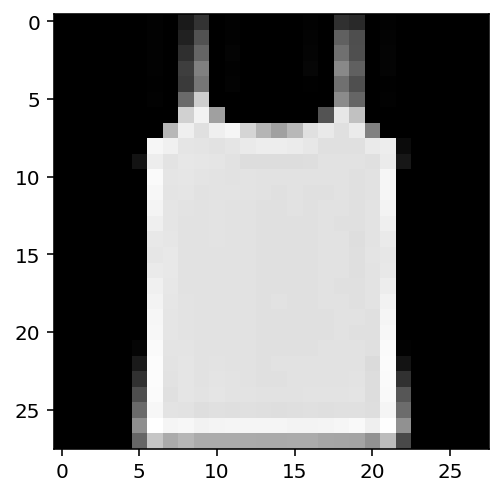

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
# we complete after meeting
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

### 4.1 Iniilaizing the Pytorch Model

In [33]:
#Forward Pass
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.resize_(64, 1, 784)
img_idx = 0
ps = model.forward(images[img_idx,:])

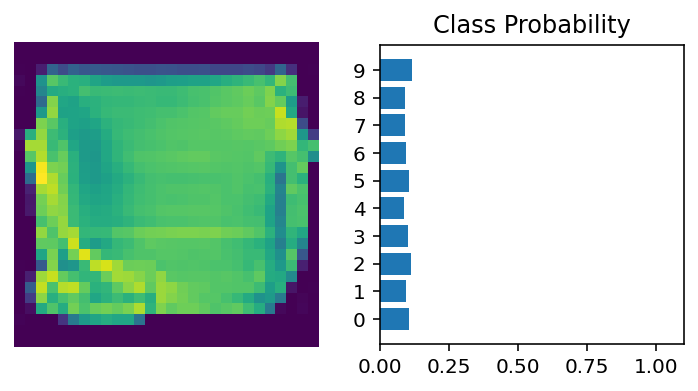

In [35]:
# Hyperparameters for our network
input_size   = 784
hidden_sizes = [128, 64]
output_size   = 10


# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
images, labels = next(iter(trainloader))
images.resize_(64, 784)
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
optimizer.step()

images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)


In [190]:
learning_rate = 0.01
epochs = 6
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
Visualizer = Visualizer(epochs)

TypeError: __init__() missing 1 required positional argument: 'epochs'

In [43]:
def training (trainloader):
    i=0
    training_losses_list =list()
    print_every = 40
    running_training_loss=0
    for each_batch in trainloader:
        x,y = each_batch
        x = x.view(x.size(0),-1)
        loss = criterion(model(x),y)
        model.zero_grad()
        loss.backward()
        optimizer.step() 
        running_training_loss += loss.item()
        training_losses_list.append(loss.item())
        if i % print_every == 0:
            print(f"\tIteration - training: {i}\t Loss: {running_training_loss/print_every:.4f}")
            running_training_loss = 0
        i=i+1
    return training_losses_list

In [57]:
def testing (testloader):
    i=0
    testlosses_list =list()
    testaccuracy_list =list()
    print_every = 40
    running_test_loss=0
    av_accuracy = 0
    for each_testbatch in testloader:
        x,y = each_testbatch
        x = x.view(x.size(0),-1)
        with torch.no_grad():
            logss=model(x)
            loss = criterion(model(x),y)
            testlosses_list.append(loss.item())
            running_test_loss += loss.item()
            ps = torch.exp(logss)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == y.view(*top_class.shape) 
            av_accuracy +=torch.mean(equals.type(torch.FloatTensor)).item()
        if i % print_every == 0:
            print(f"\tIteration - testing: {i}\t Loss: {running_test_loss/print_every:.4f}")
            running_test_loss = 0
        i=i+1
    return testlosses_list

Epoch: 1/6
	Iteration - training: 0	 Loss: 0.0433
	Iteration - training: 40	 Loss: 1.6452
	Iteration - training: 80	 Loss: 1.6556
	Iteration - training: 120	 Loss: 1.6436
	Iteration - training: 160	 Loss: 1.6544
	Iteration - training: 200	 Loss: 1.6474
	Iteration - training: 240	 Loss: 1.6506
	Iteration - training: 280	 Loss: 1.6544
	Iteration - training: 320	 Loss: 1.6550
	Iteration - training: 360	 Loss: 1.6618
	Iteration - training: 400	 Loss: 1.6597
	Iteration - training: 440	 Loss: 1.6512
	Iteration - training: 480	 Loss: 1.6541
	Iteration - training: 520	 Loss: 1.6585
	Iteration - training: 560	 Loss: 1.6543
	Iteration - training: 600	 Loss: 1.6483
	Iteration - training: 640	 Loss: 1.6471
	Iteration - training: 680	 Loss: 1.6416
	Iteration - training: 720	 Loss: 1.6600
	Iteration - training: 760	 Loss: 1.6564
	Iteration - training: 800	 Loss: 1.6686
	Iteration - training: 840	 Loss: 1.6558
	Iteration - training: 880	 Loss: 1.6529
	Iteration - training: 920	 Loss: 1.6595
	Iteratio

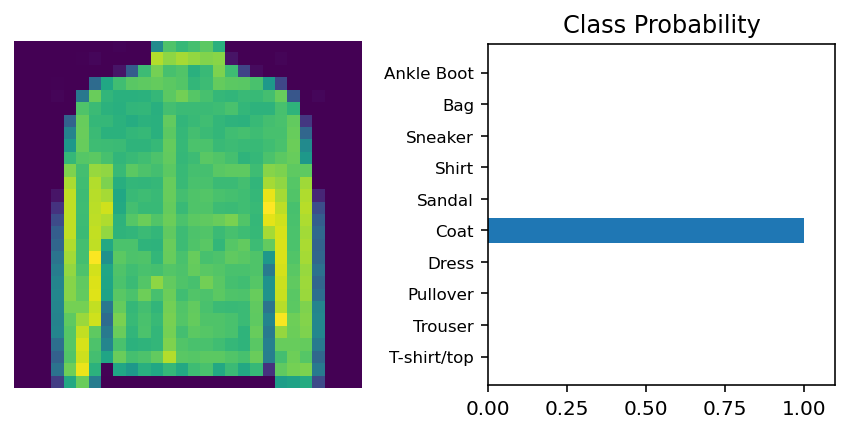

In [58]:
for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")
    trainlosses = training (trainloader)
    model.eval()
    testinglosses = testing (testloader)
    model.train()
    torch.save(model, 'Fashion_minst.pth')
    
images, labels = next(iter(testloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps,version='Fashion')
       

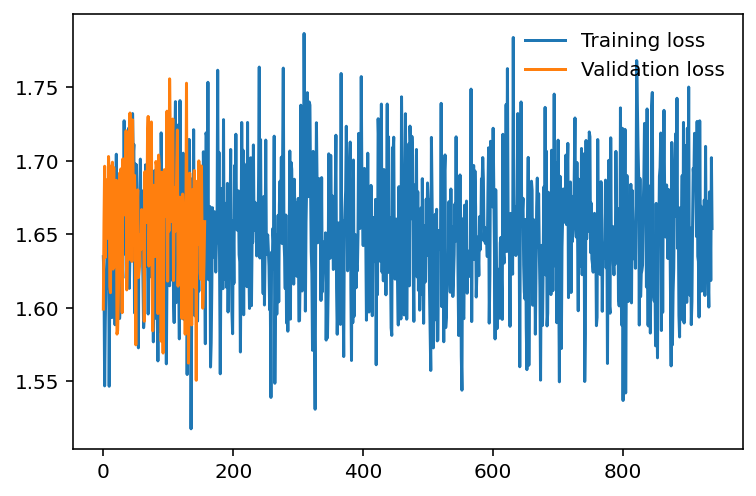

In [59]:
plt.plot(trainlosses, label='Training loss')
plt.plot(testinglosses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [144]:
# Load The Save Model

data_dir = '/'

test_transforms = transforms.Compose([transforms.Resize(784),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5), (0.5))
                                     ])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2=torch.load('Fashion_minst.pth')
model2.eval()
model2

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

In [161]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    input = Variable(image_tensor)
    input = input.to(device)
    output = model2(input)
    index = output.data.cpu().numpy().argmax()
    return index  

def get_random_images(num):
    random_seed= 42
    from torch.utils.data.sampler import SubsetRandomSampler
    classes = testset.targets
    dataset_size = len(testloader)
    indices = list(range(dataset_size))
    np.random.seed(random_seed)
    np.random.shuffle(indices)
    sampler = SubsetRandomSampler(indices)
    loader = torch.utils.data.DataLoader(testset, sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels , classes

In [170]:
label_lookup = {
                1:'Trouser',
                2:'Pullover',
                3:'Dress',
                4:'Coat',
                5:'Sandal',
                6:'Shirt',
                7:'Sneaker',
               8:'Bag',
               9:'Ankle Boot'
        }

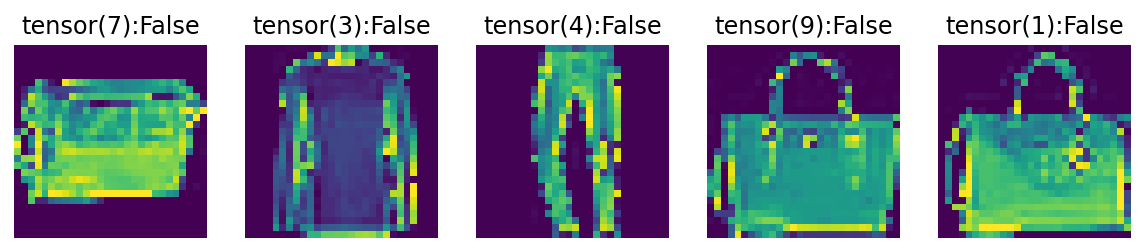

In [188]:
to_pil = transforms.ToPILImage()
images, labels, classes = get_random_images(5)



fig=plt.figure(figsize=(10,10))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)
plt.show()